# Predição de Churn
## Kaggle
## Original disponível em [aqui](https://www.kaggle.com/code/abanobmorgan/customer-churn-prediction).
Public score: 0.98222

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Carregando os dados com o pandas dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexlopespereira/idp_competenciasdegestao/main/Notebooks/Aula6/data/train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Limpando os dados
* primeiro calcule o total_net_minutes para reduzir o número de features; fazer o mesmo com as chamadas e a cobrar
* segundo vamos converter todas as strings yes, no em ints, como em colunas (voice_mail_plan, international_plan)
* então vamos converter os valores categóricos em vetores onehote como (state e area_code)
* por último, remover todos as features repetidas e colunas inúteis, como área (código e estado) 


In [7]:
def clean_Data(df):    
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 

    df.drop(columns= ['state', 'area_code'], inplace= True)
    #df.area_code = pd.Categorical(df.area_code).codes



    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
    return df



In [ ]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# spliting the data 
* we are going to use sklearn to split the data 
* first we need to split the dataframe into x, y 
* then use train-test-spilt function to split the data 
* use random state to have same data each time you run the program 
* use stratify to cut the data with the same portion


In [14]:
from sklearn.model_selection import train_test_split 

X = df.drop(columns= ['churn'])
y = df['churn']

x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=.25, stratify= y, random_state=1) 
y_train.value_counts(), y_val.value_counts()

(no     2739
 yes     448
 Name: churn, dtype: int64, no     913
 yes    150
 Name: churn, dtype: int64)

In [15]:
x_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
458,NE,74,area_code_415,no,yes,25,194.6,84,33.08,119.9,103,10.19,175.5,75,7.90,13.1,2,3.54,2
3340,AR,57,area_code_415,no,yes,23,208.7,57,35.48,233.4,132,19.84,108.8,117,4.90,9.1,5,2.46,1
1011,IA,92,area_code_510,no,yes,25,134.0,112,22.78,206.0,111,17.51,180.6,118,8.13,9.7,4,2.62,0
2971,DE,12,area_code_415,no,no,0,206.1,105,35.04,246.6,104,20.96,254.6,83,11.46,12.1,7,3.27,2
1311,DE,79,area_code_415,no,yes,34,103.7,100,17.63,236.3,78,20.09,256.6,102,11.55,14.8,4,4.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,MT,101,area_code_415,no,no,0,154.4,130,26.25,217.2,101,18.46,185.4,52,8.34,13.9,4,3.75,1
3077,NY,131,area_code_415,no,no,0,264.2,118,44.91,180.0,89,15.30,223.9,104,10.08,10.7,1,2.89,2
1211,AL,96,area_code_415,yes,no,0,200.6,117,34.10,289.5,120,24.61,98.3,95,4.42,11.2,5,3.02,2
1586,NC,55,area_code_408,yes,no,0,221.0,115,37.57,165.4,97,14.06,235.4,117,10.59,9.7,4,2.62,1


In [16]:
y_train

458     no
3340    no
1011    no
2971    no
1311    no
        ..
2197    no
3077    no
1211    no
1586    no
1780    no
Name: churn, Length: 3187, dtype: object

# Executar a função de limpeza dos dados

In [17]:
# Limpar os dados
x_train  = clean_Data(x_train)
# Transformar yes/no em 0s e 1s
y_train = pd.Categorical(y_train).codes 

# Limpar os dados
x_val  = clean_Data(x_val)
# Transformar yes/no em 0s e 1s
y_val= pd.Categorical(y_val).codes

print(df.international_plan.value_counts())
df.head()

no     3854
yes     396
Name: international_plan, dtype: int64


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [18]:
y_val

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

# Histograma de todas as variaveis numéricas

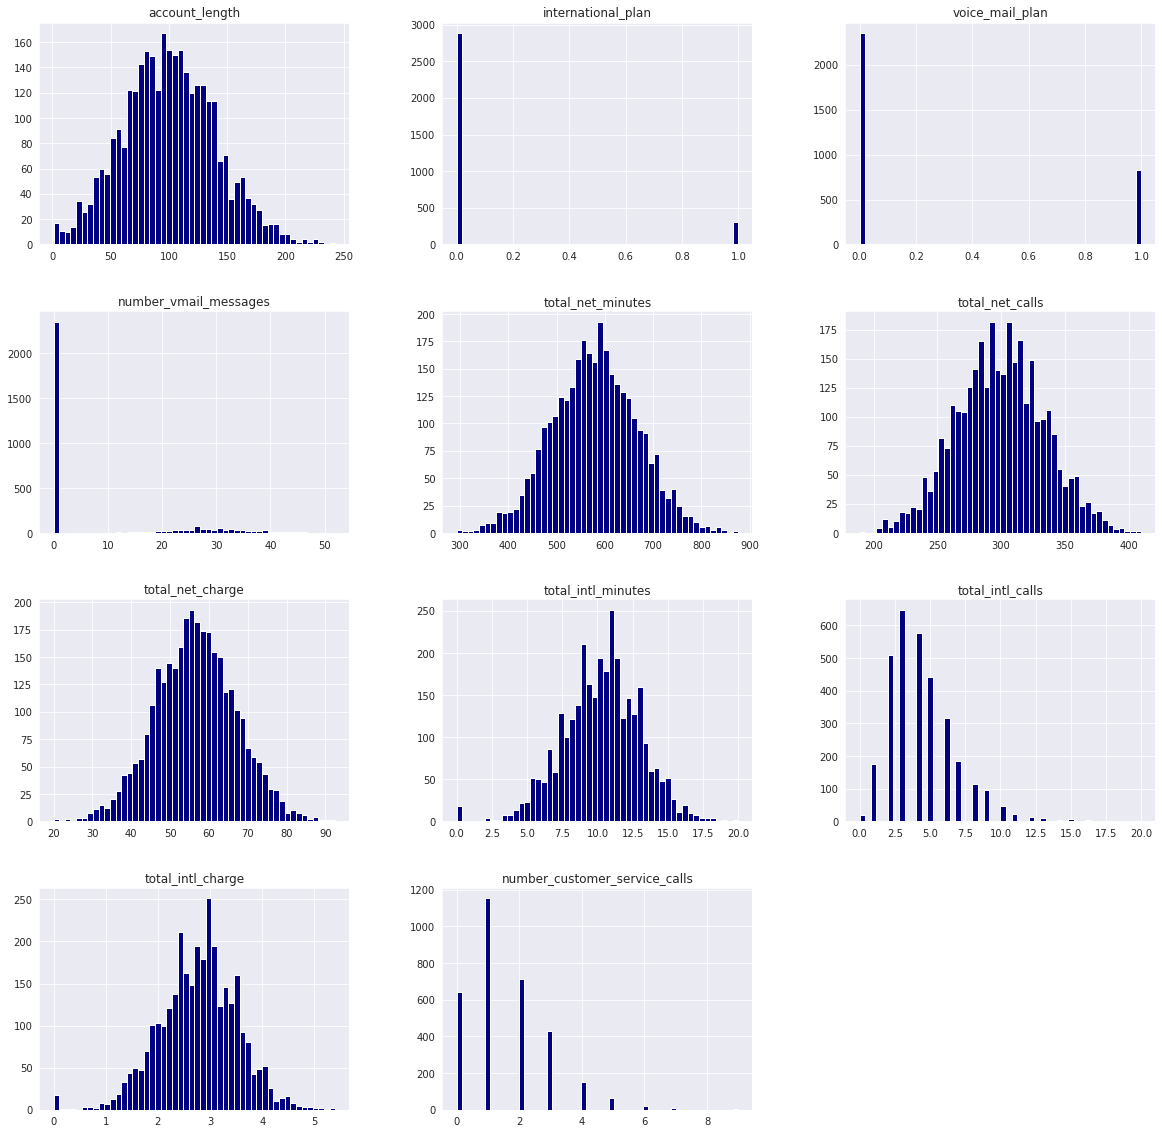

In [19]:
import seaborn as sns
sns.set_style('dark')
temp = x_train[['account_length', 'international_plan','voice_mail_plan', 'number_vmail_messages', 
           'total_net_minutes','total_net_calls', 'total_net_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls' ]]
temp.hist(bins=50,figsize=(20,20),color='navy');

# create some models 

## first we start with simple model such as LogisticRegression 
* it preform well but not the best 

In [20]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(max_iter=300,)
lr.fit(x_train,y_train )
lr.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8650768748038908

In [21]:
pre = lr.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.8570084666039511

## Usando um RandomForestClassifier 


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train )
clf.score(x_train, y_train)

1.0

In [23]:
pre = clf.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9774223894637818

In [24]:
clf.score(x_val, y_val)

0.9774223894637818

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, clf.predict(x_val))

0.9774223894637818

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$

#### Outras métricas de avaliação de modelo de ML
https://scikit-learn.org/stable/modules/model_evaluation.html

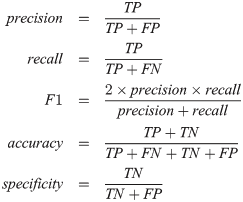

## Agora com um classificador  GradientBoostingClassifier


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train,y_train )
xg.score(x_train, y_train)

0.9996862252902416

In [27]:
pre = xg.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9774223894637818

In [28]:
xg.score(x_val, y_val)

0.9774223894637818

# Carregando o dado de teste

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/alexlopespereira/idp_competenciasdegestao/main/Notebooks/Aula6/data/test.csv')
x_test =test.drop(columns='id')

# Limpando o dado de teste

In [ ]:
x_test = clean_Data(x_test)
x_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


# Realizando a predição sobre o dado de teste disponibilizado pelo Kaggle
## usando o modelo xg boost 
### Depois de usarmos o modelo para prever os dados salvamos os valores em arquivo csv para usar no envio

In [ ]:
pre = xg.predict(x_test)
print(pre[:5])
ansXG = pd.read_csv('https://raw.githubusercontent.com/alexlopespereira/idp_competenciasdegestao/main/Notebooks/Aula6/data/sampleSubmission.csv')
ansXG.churn = pre
ansXG.churn= ansXG.churn.map({ 1: 'yes', 0 : 'no'}) 
ansXG.to_csv('sampleSubmissionXG.csv', index=False)
ansXG.head()

[0 0 0 0 0]


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


## Agora usando o modelo do randomforest 


In [ ]:
pre = clf.predict(x_test)
print(pre[:5])
ansCLF = pd.read_csv('https://raw.githubusercontent.com/alexlopespereira/idp_competenciasdegestao/main/Notebooks/Aula6/data/sampleSubmission.csv')
ansCLF.churn = pre
ansCLF.churn= ansCLF.churn.map({ 1: 'yes', 0 : 'no'}) 
ansCLF.to_csv('sampleSubmissionCLF.csv', index=False)
ansCLF.head()

[0 0 0 0 0]


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


**to check which one will be better for the data but both have the same accuracy value**

# model saving
Using joblib to dump the models into joblib files with the model name 

In [ ]:
from joblib import dump
dump(clf, 'clf.joblib') 
dump(xg, 'xg.joblib') 

['xg.joblib']